# Exploratory Data Analysis & Constraints Extraction

This notebook explores the dataset and calculates the Min/Max price constraints for each product, which are required for the RL agent.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [2]:
# Load Data
df = pd.read_csv('../data/sales_data.csv')
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


In [3]:
# Basic Stats
print(df.describe())
print(df.info())

       Inventory Level    Units Sold  Units Ordered         Price  \
count     76000.000000  76000.000000   76000.000000  76000.000000   
mean        301.062842     88.827316      89.090645     67.726028   
std         226.510161     43.994525     162.404627     39.377899   
min           0.000000      0.000000       0.000000      4.740000   
25%         136.000000     58.000000       0.000000     31.997500   
50%         227.000000     84.000000       0.000000     64.500000   
75%         408.000000    114.000000     121.000000     95.830000   
max        2267.000000    426.000000    1616.000000    228.030000   

           Discount     Promotion  Competitor Pricing      Epidemic  \
count  76000.000000  76000.000000        76000.000000  76000.000000   
mean       9.087039      0.328947           69.454029      0.200000   
std        7.475781      0.469834           40.943818      0.400003   
min        0.000000      0.000000            4.290000      0.000000   
25%        5.000000    

## Price Constraints per Product
We need to ensure the RL agent suggests prices within the historical range for each product.

In [4]:
# Calculate Min and Max Price per Product ID
price_constraints = df.groupby('Product ID')['Price'].agg(['min', 'max']).reset_index()
price_constraints.rename(columns={'min': 'min_price', 'max': 'max_price'}, inplace=True)

# Save constraints to a file for later use
price_constraints.to_csv('price_constraints.csv', index=False)
print("Price constraints saved to price_constraints.csv")
price_constraints.head()

Price constraints saved to price_constraints.csv


,Product ID,min_price,max_price
0,P0001,7.30,121.94
1,P0002,11.59,99.74
2,P0003,16.85,181.41
3,P0004,4.74,142.17
4,P0005,9.94,132.37


## Visualizations

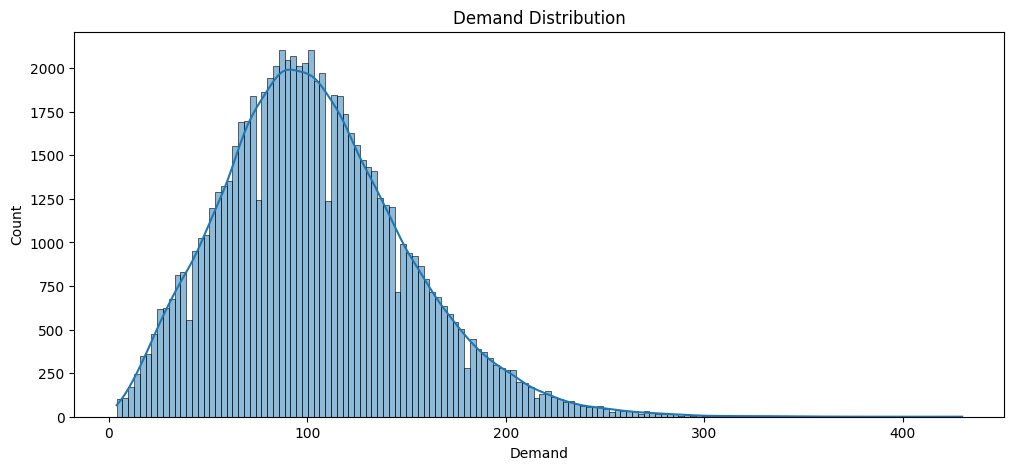

In [5]:
plt.figure(figsize=(12, 5))
sns.histplot(df['Demand'], kde=True)
plt.title('Demand Distribution')
plt.show()

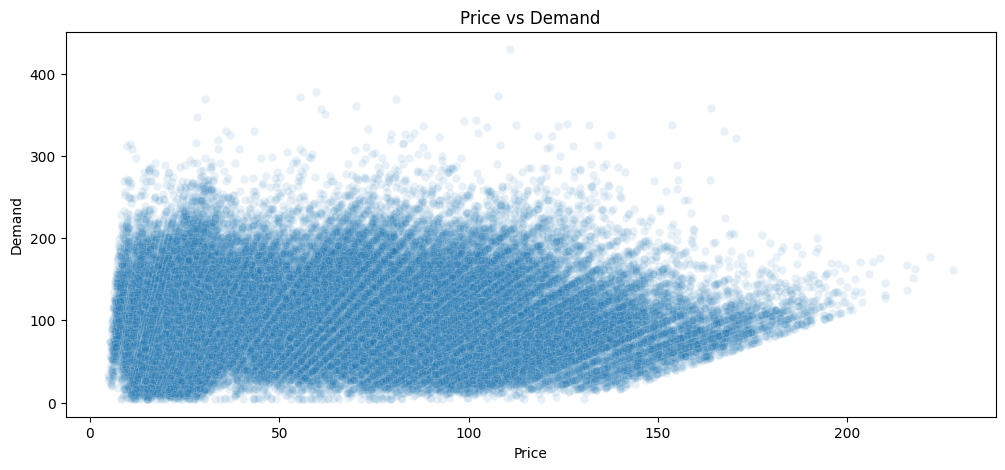

In [6]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Price', y='Demand', data=df, alpha=0.1)
plt.title('Price vs Demand')
plt.show()